In [1]:
import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy import stats, signal


In [2]:
file_path = '/home/kedoxey/CRCNS/PyramidalCellSimulations/models/NEURON/NMLCL000073-NEURON/output/LFP_soma/LFP_soma-25Ex1-1x40Hz-syns/L5PC_LFP_soma-25Ex1-1x40Hz-syns_data.pkl'
with open(file_path,'rb') as fp:
    all_data = pickle.load(fp)
simData = all_data['simData']

--No graphics will be displayed.


In [9]:
time_windows_fpath = '/home/kedoxey/CRCNS/PyramidalCellSimulations/models/NEURON/NMLCL000073-NEURON/output/eap_time_windows.pkl'
with open(time_windows_fpath,'rb') as fp:
    time_windows = pickle.load(fp)
slice_start = time_windows['soma'][25][0]
slice_end = time_windows['soma'][25][1]
t_spike = time_windows['soma'][25][2]

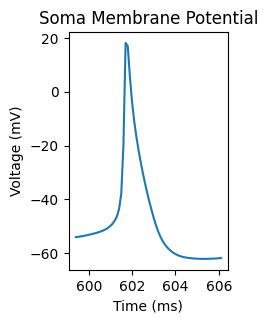

In [10]:
%matplotlib inline
t = np.array(simData['t'])
V_soma = np.array(simData['V_soma']['cell_0'])
t_spikes = t[np.where(V_soma>10)]
t_window = t[slice_start:slice_end]

fig, axs = plt.subplots(figsize=(2.5,10/3))
V_soma_window = V_soma[slice_start:slice_end]
axs.plot(t_window, V_soma_window, color='tab:blue')
axs.set_title(f'Soma Membrane Potential')
axs.set_ylabel('Voltage (mV)')
axs.set_xlabel('Time (ms)')

xticks = [(int(t_spike.round(0))-2)+2*i for i in range(4)]
axs.set_xticks(xticks)

fig.tight_layout()
fig.savefig('/home/kedoxey/CRCNS/PyramidalCellSimulations/models/NEURON/NMLCL000073-NEURON/output/LFP_soma/LFP_soma-25Ex1-1x40Hz-syns/small.png',bbox_inches='tight',dpi=300)